In [1]:
import numpy as np
import keras 
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
from keras.models import load_model

In [3]:
model = load_model('plant_disease_final.h5')

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 15)                7695      
Total params: 40,938,319
Trainable params: 33,303,055
Non-trainable params: 7,635,264
__________________________________

In [5]:
from keras import models
from keras import layers
from keras import optimizers

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [7]:
img3 = cv2.imread('./Test Images sample/pot_EB.JPG')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img3 = cv2.resize(img3,(224,224))
img4 = np.reshape(img3,[1,224,224,3])

{'Tomato Early Blight': 7, 'Corn Gray Leaf Spot': 3, 'Tomato LeafMold': 9, 'grape black rot': 16, 'TomatoBacterial Spot ': 12, 'Tomato Late Blight': 8, 'Potato Healthy': 6, ' Potato Late Blight ': 1, 'grape leaf blight': 18, 'TomatoTwo Spotted Spider Mite': 13, ' Corn Northern Leaf Blight': 0, 'Tomato Yellow Leaf Curl': 11, 'Corn CommonRust': 2, 'Potato Early Blight': 5, 'Corn healthy': 4, 'grape healthy': 17, 'Tomatohealthy': 14, 'Tomato Target Spot': 10, 'grape black measles': 15}

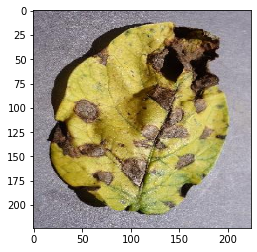

In [8]:
plt.imshow(img3)
plt.show()

In [10]:
disease = model.predict_classes(img4)
prediction = disease[0]
print(prediction)

2


In [11]:
reverse_mapping = [' Corn Northern Leaf Blight','Potato Late Blight','Corn Common Rust','Corn Gray Leaf Spot', 'Corn healthy','Potato Early Blight','Potato Healthy','Tomato Early Blight','Tomato Late Blight','Tomato Leaf Mold','Tomato Target Spot','Tomato Yellow Leaf Curl','Tomato Bacterial Spot','Tomato Two Spotted Spider Mite','Tomato healthy','grape black measles','grape black rot','grape healthy', 'grape leaf blight' ]

In [12]:
prediction_name = reverse_mapping[prediction]
prediction_name

'Corn Common Rust'

In [53]:
a=100

firebase = firebase.FirebaseApplication('https://abhayfirebase.firebaseio.com/')
# result = firebase.get('/user' , None) #none = one
# print result 

result = firebase.post('/user/' + str(prediction_name) , {' gedi '  : {'bye': 'ok'}}) #only jason obejct can post
print result


# result_put = firebase.put('user' , {"third" : {'bye': 'ok'}})

# print result_put

{u'name': u'-L7yE3nUsfaOnkVV5voe'}
